https://bit.ly/DSNN-3-CNN

# Классификация MNIST сверточной сетью

https://www.kaggle.com/c/digit-recognizer

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# приводим размерность к удобному для обаботки виду
# добавляем размерность канала
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train.shape

(60000, 28, 28, 1)

## Визуализируем исходные данные

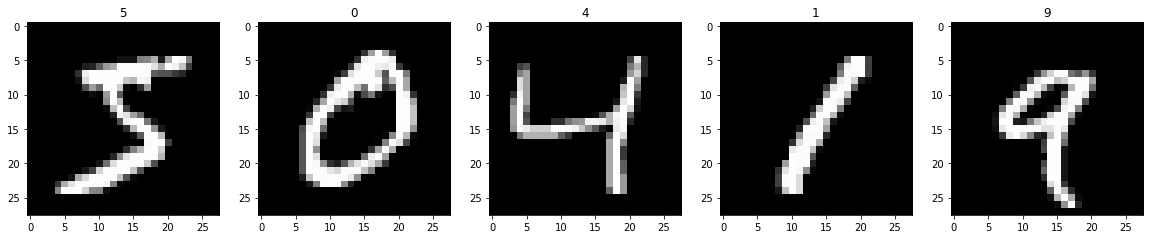

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X_train[:5], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[:,:,0], cmap='gray');
    subplot.set_title(y_train[i - 1]);

## Собираем сверточную сеть для обучения

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, # skolko kanalov hotim videt na vqhode
                        kernel_size=(5, 5), # razmer svertki, filtra = 3 = (3,3)
                        padding='same', # kogda ne hotim chtobq kartinka ne umenshalas, zapolnenije matrizq vokrug nuljami 
                        # valid, kogda izmenjat ne nado. Same = dobavljaetsja padding v vide 0 ramki 
                        activation='tanh',
                        input_shape=X_train.shape[1:]), #28x28x3
    keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'), # umenshajem kartinku, radi umenshenija kol-va vesov i vqchelenij
                            # stride - na skolko pikselei hotim dvigatsja vpravo, vniz. KOgda k konzu svjpstochnoi seti kartinka
    # umenshaetsja, mq mozem oereshagivat. Esjo pomogajet umenshat kartinku po razmernosti
                            # dilation - by defailut 1, prostranstvo rastjagevaljetsja. Polezno k konzu seti. KOgda nuzno priznaki dostat iz raznqh mest
    
    keras.layers.Conv2D(filters=16, 
                        kernel_size=(5, 5),
                        padding='same',
                        activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='SGD',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 16)        2416      
                                                                 
 average_pooling2d_15 (Avera  (None, 7, 7, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 32)              

## One-hot кодировка разметки

In [ ]:
y_train_ohe = keras.utils.to_categorical(y_train)
y_test_ohe = keras.utils.to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(y_train_ohe.shape) # binarnoe predstavljenije, ego zdjot kategorialsnaja crossentropija

(60000,)
(60000, 10)


## Запускаем обучение

In [ ]:
!nvidia-smi

In [ ]:
model.fit(X_train, y_train_ohe,
          batch_size=128, 
          epochs=5,
          validation_data=(X_test, y_test_ohe))

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2647 - accuracy: 0.9262 - val_loss: 0.2460 - val_accuracy: 0.9327
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2465 - accuracy: 0.9309 - val_loss: 0.2292 - val_accuracy: 0.9376
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2310 - accuracy: 0.9358 - val_loss: 0.2154 - val_accuracy: 0.9405
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2173 - accuracy: 0.9390 - val_loss: 0.2039 - val_accuracy: 0.9432
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2053 - accuracy: 0.9425 - val_loss: 0.1920 - val_accuracy: 0.9468


## Предсказываем класс объекта

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


## Оцениваем качество решение на валидационной выборке

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy', accuracy_score(y_test, y_pred_labels))

Accuracy 0.9201


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.92      0.91      0.91      1010
           4       0.92      0.92      0.92       982
           5       0.92      0.87      0.90       892
           6       0.92      0.95      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.89      0.91      0.90       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



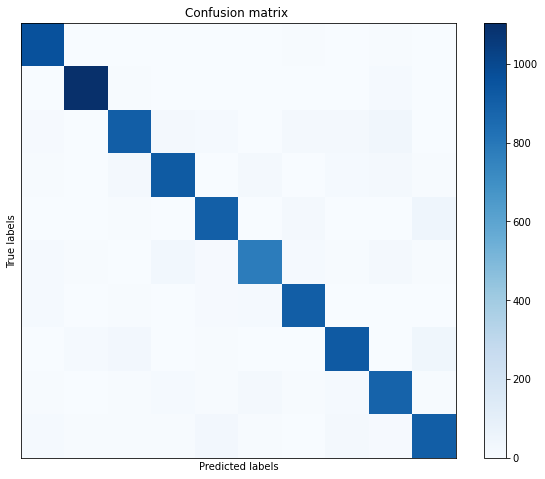

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Визуализируем предсказания для тестовой выборки

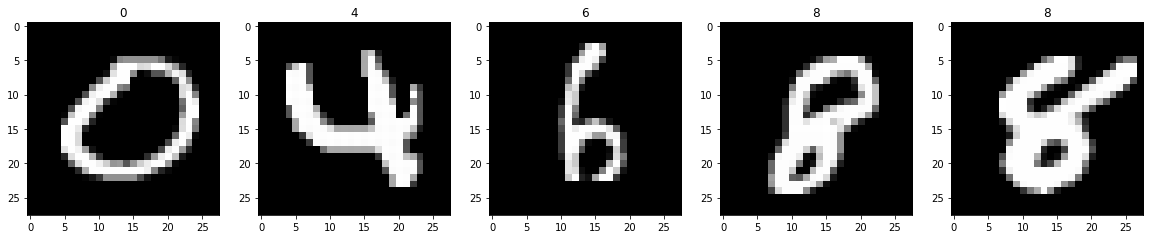

In [ ]:
fig = plt.figure(figsize=(20, 10))
indices = np.random.choice(range(len(X_test)), 5)
img_prediction = zip(X_test[indices], y_pred_labels[indices])
for i, (img, pred) in enumerate(img_prediction, 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img[...,0], cmap='gray');
    subplot.set_title(pred);

# Дополнительные материалы:

1. neurohive.io https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/
2. Использование предобученных архитектур для классификации https://www.kaggle.com/julichitai/asl-classification-keras
3. Обучение сверточных нейросетей для сегментации https://www.kaggle.com/julichitai/carvana-cars-segmentation-keras
